# Assignment 1

Authors:
* Francesca Boccardi, francesca.boccardi@studio.unibo.it
* Luigi Podda, luigi.podda@studio.unibo.it
* Matteo Nestola, matteo.nestola@studio.unibo.it

**Due to**: 11/01/2022 (dd/mm/yyyy)

If you deliver it by 11/12/2022 your assignment will be graded by 11/01/2023.


**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

Please, read ALL the following instructions :)

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label.
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES. [What is punctuation?]{https://en.wikipedia.org/wiki/English_punctuation}

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!
If you use random embeddings or placeholder embeddings (e.g., everything is 0) this is automatically solved.

If you want to use other techniques: when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general (brief!) description of the task you have addressed and how you have addressed it
* A brief analysis of the data (class distribution, lenght, etc)
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis


# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the correctness of approach/methodology
* 1 point for the handling of OOV terms
* 1 point for the correct implementation of models (they must run and do the right thing)
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

The evaluation will not be based on the performance of the models!

We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy.

# Deliver

* Two files: a pdf file for the report, and a python notebook
* Put the names of the member of the team at the beginning of both files
* What about additional files, for example models or weights? You can upload them in a private cloud and insert the link in the report.
* Please, submit a notebook with clear sections, text boxes, and comments and indications about what is going on in the code. When we do not understand what is going on we get annoyed, when we are annoyed we tend to be more severe in our evaluation.



# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1273064/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.
If we do not reply within 3-4 days, please send it again!

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# Additional notes and FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* For the baseline, it must have only two trainable layers: the BiLSTM and the Dense/FC one. The Dense layer is the "classification head" with softmax activation. You must not add an additional dense layer on top of the baseline. You can use the embedding layer before the BiLSTM, but it must be not trainable.
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.
* For the application of the Dense Layer, it is recommended to use a Time-Distributed Dense. In any case, doing otherwise is NOT considered an error.
* Some examples of things you can analyze in your discussion and error analysis are: the performances on the most frequent classes and the less frequent classes, precision and recall, the confusion tables, specific misclassified samples.
* Punctuation: you must keep the punctuation in the documents, since it may be helpful for the model, you simply must ignore it when you perform the evaluation of the model, not considering the punctuation classes among the ones you use to compute F1 macro score. If you are curious, you can run ADDITIONAL experiments where you remove punctuation to see its impact.

# 1. Imports
In this section are imported all the useful libraries and packages.

In [ ]:
import os
import shutil
import sys
import urllib.request
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import itertools
import re

import keras
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 2. Data preparation

## 2.1 Data download



Let's first download the corpus used in this work, [Dependency Treebank](https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip).

In [ ]:
dataset_name = "dependency_treebank"
dataset_folder = os.path.join(os.getcwd())

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip'

dataset_path = os.path.join(dataset_folder, "dependency_treebank.zip")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = zipfile.ZipFile(dataset_path, 'r')
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful download
Successful extraction


## 2.2 Documents splitting & manipulation

In [ ]:
# Extract dataset path
dataset_path = os.path.join(os.getcwd(), dataset_name)

# Compute the total number of documents
documents = sorted(os.listdir(dataset_path)) # name-sorted list of all documents contained into `dataset_path`
n_docs = len(documents)
print(f"The corpus contains {n_docs} documents")

The corpus contains 199 documents


In [ ]:
# Create 3 different folders for train, validation and test documents

%mkdir dependency_treebank/test
%mkdir dependency_treebank/train
%mkdir dependency_treebank/validation

The `split_document` function splits each document in different sentences, then each sentence is saved in a separated file `sentence_id.dp`, located in the corresponding split directory .


In [ ]:
def split_document(file_path, dataset_path, split, index):

  """
  Split into sentences the document whose `file_path` is passed as input. For each sentence extracted, a new file is created into the `split` folder.
  """

  with open(file_path,'r') as data_file:
    text = data_file.read()
    sentences = text.split("\n\n")

  for element in sentences:
    textfile = open(f"{dataset_path}/{split}/{index}.dp", "w")
    textfile.write(element)
    textfile.close()
    index+=1

  return index

In [ ]:
# Split documents into train, validation and test according to their index and further split each of them into sentences
sentence_id = 1

for file_id in range(1,n_docs):
  file_name = documents[file_id]
  file_path = os.path.join(dataset_path, file_name)

  # Split into train, validation and test according to `file_id`
  if file_id < 101:
    sentence_id = split_document(file_path, dataset_path, "train", sentence_id)

  elif file_id >= 101 and file_id <= 150:
    sentence_id = split_document(file_path, dataset_path, "validation", sentence_id)

  else:
    sentence_id = split_document(file_path, dataset_path, "test", sentence_id)

## 2.3 Dataframes creation
For simplicity reasons, sentences files are collected into 3 different dataframes, one for each split. In particular, `create_dataframe` function creates a dataframe of the files contained in the folder passed as input. It is used to create three different dataframes for train, validation and test sets.

In [ ]:
def create_dataframe(split, dataset_path):

  """
  Create a dataframe of all the sentences contained into the `split` folder.
  """

  df = pd.DataFrame()
  split_folder = os.path.join(dataset_path, split)

  for filename in sorted(os.listdir(split_folder)):
    file_path = os.path.join(split_folder, filename)

    try:
      if os.path.isfile(file_path):
          df_file = pd.read_table(file_path, sep="\t", header = None, names= ["word","tag","number"])
          df_file = df_file.drop(columns = ["number"])
          sentence_id = int(filename.split(".")[0])
          df_file["sentence_id"] = sentence_id
          df = pd.concat([df, df_file])

    except Exception as e:
        print('Failed to process %s. Reason: %s' % (file_path, e))
        sys.exit(0)

  return df

In [ ]:
# Create different dataframes for train, validation and test data

df_train = create_dataframe('train', dataset_path)
df_validation = create_dataframe('validation', dataset_path)
df_test = create_dataframe('test', dataset_path)

Let's have a look to the first sentence of the training set.

In [ ]:
df_train[df_train["sentence_id"] == 1]

,word,tag,sentence_id
0,Rudolph,NNP,1
1,Agnew,NNP,1
2,",",",",1
3,55,CD,1
4,years,NNS,1
5,old,JJ,1
6,and,CC,1
7,former,JJ,1
8,chairman,NN,1
9,of,IN,1


## 2.4 Input formatting - Sentences and tags lists

To ease the manipulation of data, from each dataframe are extracted the list of sentences and the correspondent lists of tags.

In [ ]:
def sentence_tag_split(df):

  """
  Given `df`, create:
    - a list of sentences, where each sentence is a list of words
    - a list containing, for each sentence, the corresponding list of tags
  """

  sentences_ids = df["sentence_id"].unique()
  sentences = []
  tags = []

  for id in sentences_ids:
    df_sentence = df[df['sentence_id']==id]
    sentence = list(df_sentence["word"])
    tag = list(df_sentence["tag"])

    sentences.append(sentence)
    tags.append(tag)

  return sentences, tags

In [ ]:
sentences_train, tags_train = sentence_tag_split(df_train)
sentences_val, tags_val = sentence_tag_split(df_validation)
sentences_test, tags_test = sentence_tag_split(df_test)

print("Sentence example:", sentences_train[0])
print("Tags:", tags_train[0])

Sentence example: ['Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.']
Tags: ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', 'CC', 'JJ', 'NN', 'IN', 'NNP', 'NNP', 'NNP', 'NNP', ',', 'VBD', 'VBN', 'DT', 'JJ', 'NN', 'IN', 'DT', 'JJ', 'JJ', 'NN', '.']


# 3. Data analysis

To have a better comprehension of the distribution of the classes in the dataset, the support for each class is visualized.

In [ ]:
column = 'tag'
print("Distribution of train tags: ")
print(df_train[column].value_counts())
print()

print("Distribution of test tags: ")
print(df_test[column].value_counts())
print()

print("Distribution of val tags: ")
print(df_validation[column].value_counts())
print()

Distribution of train tags: 
NN       6390
NNP      5279
IN       5049
DT       4175
JJ       3053
NNS      3043
,        2603
.        1979
VBD      1562
RB       1515
CD       1474
VB       1210
CC       1166
VBZ      1152
VBN      1059
TO       1051
PRP       957
VBG       780
VBP       734
MD        418
PRP$      412
``        409
POS       405
''        399
$         355
:         294
WDT       207
JJR       160
WP        142
RP        140
NNPS       98
JJS        94
WRB        92
RBR        88
-RRB-      56
-LRB-      53
EX         49
RBS        20
LS         10
PDT         9
WP$         6
FW          2
#           1
UH          1
SYM         1
Name: tag, dtype: int64

Distribution of test tags: 
NN       2354
IN       1613
NNP      1471
DT       1317
NNS       934
JJ        910
CD        847
,         772
.         630
VBD       627
VB        392
RB        377
TO        377
VBN       362
CC        360
VBZ       274
VBG       216
$         206
PRP       187
MD        165
POS     

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


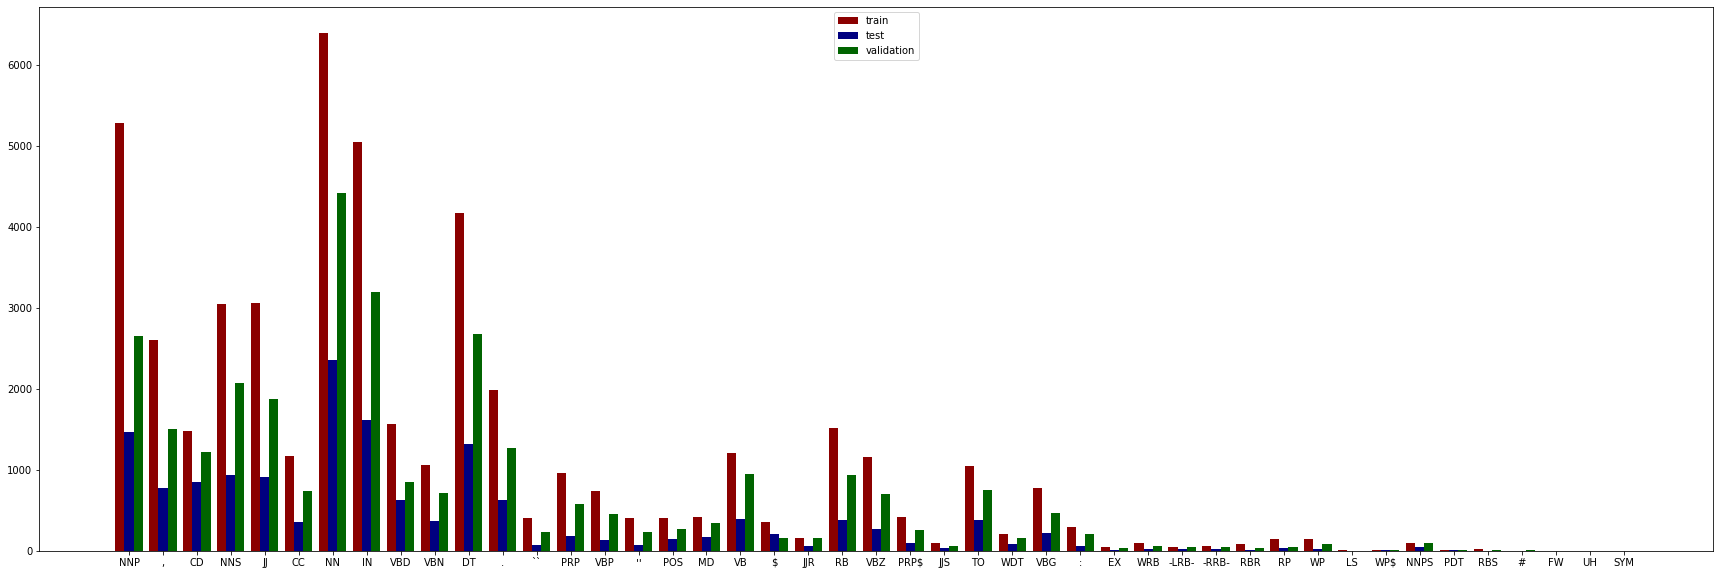

In [ ]:
# Tags distribution visualization

counts_train = np.asarray(df_train["tag"].tolist(), dtype=object)
counts_test =  np.asarray(df_test["tag"].tolist(), dtype=object)
counts_val =  np.asarray(df_validation["tag"].tolist(), dtype=object)

plt.figure(figsize=(30,10))
plt.hist([counts_train, counts_test, counts_val], bins=np.arange(46),label=['train','test','validation'], color=["darkred", "navy", "darkgreen"], align='left')
plt.legend(loc='upper center')
plt.show()

It is clear from the histogram of the tags distribution that the classes in the dataset have a strong difference in their support. From this, it can be inferred that the dataset is unbalanced.

# 4. Vocabulary creation & embedding

## 4.1 GloVe vocabulary download

Words are encoded by assigning to each of them an embedding vector according to the GloVe model, an unsupervised learning algorithm for obtaining vector representations for words.

The GloVe model is trained such that a pair of embeddings has weights that reflect their co-occurrence probability. The latter is defined as the percentage of times that a given word $y$ occurs within some context window of word $x$. GloVe is an example of a non-contextual word embedding model.

In [ ]:
# Downloading Glove

url = "https://nlp.stanford.edu/data/glove.6B.zip"

glove_path = os.path.join(os.getcwd(),"Glove")
glove_zip = os.path.join(os.getcwd(),"Glove", "glove.6B.zip")

if not os.path.exists(glove_path):
    os.makedirs(glove_path)

if not os.path.exists(glove_zip):
    urllib.request.urlretrieve(url, glove_zip)
    print("Successful download")

with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
    zip_ref.extractall(path=glove_path)
    print("Successful extraction")

Successful download
Successful extraction


In this case, the choice was to use GloVe-100 model, which employes 100-size embeddings. Thus, the correspondent vocabulary is extracted.

In [ ]:
# Extracting Glove-100 vocabulary

glove_size = 100

glove_file = os.path.join(os.getcwd(),"Glove", "glove.6B."+str(glove_size)+"d.txt")

print ("Loading Glove Model")
with open(glove_file, encoding="utf8" ) as f:
    lines = f.readlines()
glove_vocabulary = {}
for line in lines:
    splits = line.split()
    glove_vocabulary[splits[0]] = np.array([float(val) for val in splits[1:]])
print ("Done.",len(glove_vocabulary.keys())," words loaded!")

Loading Glove Model
Done. 400000  words loaded!


## 4.2 Vocabulary adaptation & embedding matrix creation

Starting from the GloVe vocabulary, a costumed one is created by adding to GloVe a random embedding for the Out Of Vocabulary (OOV) terms contained in the train, test and validation set.


In [ ]:
# Flattening the lists of sentences in a list
flattened_sent_train = list(itertools.chain(*sentences_train))
flattened_sent_val = list(itertools.chain(*sentences_val))
flattened_sent_test = list(itertools.chain(*sentences_test))

# Creating a list of words for train, validation and test
list_of_words_train = sorted(list(set(flattened_sent_train)))
list_of_words_val = sorted(list(set(flattened_sent_val)))
list_of_words_test = sorted(list(set(flattened_sent_test)))

In [ ]:
def add_OOV_embedding(list_of_words, vocabulary):

  """
  For all the words in `list_of_words` not contained into `vocabulary` (OOV terms), compute a random embedding and add it to `vocabulary`.
  """
  vocabulary_copy = vocabulary.copy()

  for word in list_of_words:
    if word not in vocabulary_copy.keys():
      vocabulary_copy[word] = np.random.uniform(low=-0.05, high=0.05, size=glove_size) # OOV

  return vocabulary_copy


# Update GloVe vocabulary with OOV words of train, validation and test sets

vocabulary_1 = glove_vocabulary.copy()
print("Initial size Glove vocabulary:        ", len(vocabulary_1))
vocabulary_2 = add_OOV_embedding(list_of_words_train, vocabulary_1)
print("Vocabulary size after train OOV words:", len(vocabulary_2))
vocabulary_3 = add_OOV_embedding(list_of_words_val, vocabulary_2)
print("Vocabulary size after val OOV words:  ", len(vocabulary_3))
vocabulary_4 = add_OOV_embedding(list_of_words_test, vocabulary_3)
print("Vocabulary size after test OOV words: ", len(vocabulary_4))

Initial size Glove vocabulary:         400000
Vocabulary size after train OOV words: 402363
Vocabulary size after val OOV words:   403294
Vocabulary size after test OOV words:  403742


Then, to each vocabulary word is assigned an index and all the pairs {word : index} are saved in the `word2id_dict` dictionary.

In [ ]:
# Creating word:index dictionary

vocab_size = len(vocabulary_4)+1 # +1 for padding

indexes = np.arange(1,vocab_size) # starting from 1 because 0 index is reserved for padding
word2id_dict = dict(zip(vocabulary_4.keys(), indexes))

Finally, the `embedding_matrix` is created, which contains the embedding of each word in the vocabulary, and it is indexed with the corresponding word index.

In [ ]:
# Creating the embedding matrix

embedding_matrix = np.zeros((vocab_size, glove_size))

for word, i in word2id_dict.items():
  embedding_matrix[i] = vocabulary_4.get(word)

print("The shape of the created embedding matrix is:", embedding_matrix.shape)

The shape of the created embedding matrix is: (403743, 100)


## 4.3 Data conversion

Using the `word2id_dict`, all sentences can be converted from a list of words into a list of indexes.

In [ ]:
def sentences_2_indexes(sentences, word2id_dict):
    """
    Convert each word in `sentences` into numerical format, according to `word2id_dict`.
    """
    matrix = [np.array([word2id_dict[word] for word in sentence]) for sentence in sentences]
    return matrix


# Sentences conversion into numerical format
ids_word_train = sentences_2_indexes(sentences_train, word2id_dict)
ids_word_val = sentences_2_indexes(sentences_val, word2id_dict)
ids_word_test = sentences_2_indexes(sentences_test, word2id_dict)

print("Original sentence:", sentences_train[0])
print("Numerical format:", list(ids_word_train[0]))

Original sentence: ['Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.']
Numerical format: [401708, 400107, 2, 3069, 83, 168, 6, 158, 664, 4, 400494, 400834, 400738, 401485, 2, 16, 565, 8, 128565, 370, 4, 38, 400313, 1272, 10254, 3]


## 4.4 Padding

The sentences in the corpus are not of the same length. Before feeding the input in the models, it's needed to fix the length of the sentences. Therefore, the next step after encoding the data is to define the maximum sequence length. It has been decided to compute `max_seq_length` as to handle the 99% of the training sentences.


In [ ]:
# Computing the maximum length of the 99% of the sentences

max_seq_length = int(np.quantile([len(seq) for seq in sentences_train], 0.99))
print('The computed sentence maximum length is', max_seq_length)

The computed sentence maximum length is 56


Then, all the sentences shorter than `max_seq_length` have been padded with as many 0s as to reach the maximum length, while the longer ones have simply been truncated. Also the correspondent tags lists have been padded (with the `_PAD_` tag) or truncated.

In [ ]:
# Padding each sentence with the value 0 and the correspondent list of tags with '_PAD_'

pad_sent_train = pad_sequences(ids_word_train, maxlen=max_seq_length, padding='post')
pad_sent_val = pad_sequences(ids_word_val, maxlen=max_seq_length, padding='post')
pad_sent_test = pad_sequences(ids_word_test, maxlen=max_seq_length, padding='post')

pad_tags_train = pad_sequences(tags_train, maxlen=max_seq_length, padding='post',dtype=object, value = '_PAD_')
pad_tags_val = pad_sequences(tags_val, maxlen=max_seq_length, padding='post', dtype=object, value = '_PAD_')
pad_tags_test = pad_sequences(tags_test, maxlen=max_seq_length, padding='post', dtype=object, value = '_PAD_')

print("Padded sentence:")
print(list(pad_sent_train[0]), '\n')
print("Padded tags:")
print(list(pad_tags_train[0]))

Padded sentence:
[401708, 400107, 2, 3069, 83, 168, 6, 158, 664, 4, 400494, 400834, 400738, 401485, 2, 16, 565, 8, 128565, 370, 4, 38, 400313, 1272, 10254, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Padded tags:
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', 'CC', 'JJ', 'NN', 'IN', 'NNP', 'NNP', 'NNP', 'NNP', ',', 'VBD', 'VBN', 'DT', 'JJ', 'NN', 'IN', 'DT', 'JJ', 'JJ', 'NN', '.', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_', '_PAD_']


## 4.5 One-hot encoding tags transformation

In one hot encoding, every word (even symbols) which are part of the given text data are written in the form of vectors, constituting only of one 1 and many 0s.
In order to encode tags, for each of them the one hot encoding is computed using `LabelEncoder()`. It allows, given the list of all the unique tags present in the corpus, to compute the correspondent list of one hot encodings, stored in `one_hot_tags`.

In [ ]:
# Flattening the lists of tags in a list

flattened_tags_train = list(itertools.chain(*pad_tags_train))
flattened_tags_val = list(itertools.chain(*pad_tags_val))
flattened_tags_test = list(itertools.chain(*pad_tags_test))

unique_tags_train = list(set(flattened_tags_train))
unique_tags_val = list(set(flattened_tags_val))
unique_tags_test = list(set(flattened_tags_test))

# Creating a list of unique tags for the entire dataset (this list contains also '_PAD_')
unique_tags = np.array(sorted(list(set(unique_tags_train+unique_tags_val+unique_tags_test))))

print("The list of unique tags is:", list(unique_tags))
print()
print("The total number of unique tags (including '_PAD_') is", len(unique_tags))

The list of unique tags is: ['#', '$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '_PAD_', '``']

The total number of unique tags (including '_PAD_') is 46


In [ ]:
# Compute the one-hot encoding of tags

label_encoder = LabelEncoder()
tag_2_index = label_encoder.fit_transform(unique_tags)

one_hot_tags = to_categorical(tag_2_index)

print("One-hot encoding of", unique_tags[21], "is", one_hot_tags[21])

One-hot encoding of NNPS is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Then, all the pairs {tag : one_hot_encoding} are saved in the `dict_one_hot_tags` dictionary and it is used to transform all lists of tags in lists of corresponding one-hot encodings.

In [ ]:
def tags_2_one_hot(sentences_tags, dict_one_hot_tags):

    """
    Encode each tag in `sentences_tags` with the correspondent one-hot encoding, according to `dict_one_hot_tags`.
    """
    matrix = [np.array([dict_one_hot_tags[tag] for tag in sentence_tags]) for sentence_tags in sentences_tags]
    return np.array(matrix)


# Creating tag:one_hot_encoding dictionary
dict_one_hot_tags = dict(zip(unique_tags, one_hot_tags))

# Encode tags with the correspondent one-hot encoding
one_hot_tag_train = tags_2_one_hot(pad_tags_train, dict_one_hot_tags)
one_hot_tag_val = tags_2_one_hot(pad_tags_val, dict_one_hot_tags)
one_hot_tag_test = tags_2_one_hot(pad_tags_test, dict_one_hot_tags)

In [ ]:
print("len train:",one_hot_tag_train.shape[0])
print("len validation:",one_hot_tag_val.shape[0])
print("len test:",one_hot_tag_test.shape[0])

len train: 1982
len validation: 1286
len test: 644


# 5. Trying different architectures

In this section have been tested different RNN models based on different architectures, belonging to two main groups:
- Bidirectional LSTM
- GRU

**LSTM** has an explicit memory unit which stores information relevant for learning some task. Also, in LSTMs, the memory units retain pieces of information even when the sequences get really long, preserving information from inputs that has already passed through it.
In **Bidirectional LSTMs**, unlike standard LSTMs, the input flows in both directions, and they are capable of utilizing information from both sides.
In this task the network has access to the entire sequence before making predictions, so this kind of architecture can be succesfully used.

Keeping in mind the computational expenses and the problem of overfitting, researchers have tried to come up with alternate structures of the LSTM idea. The most popular one of these alternatives is the Gated Recurrent Unit, **GRU**. In GRU architectures there is a reduction in parameters in GRU compared to LSTM.

## 5.1 LSTM + 1 Dense layer

### Definition

The first model defined is composed by
* the **Input layer**, which takes as input sentences as a sequence of indexes
* an **Embedding layer**, which is a simple lookup table that stores embeddings of each vocabulary word. Given the input as a list of indexes, it retrieves the correspondent word embeddings. In this case, it has been initialized with the `embedding_matrix` previously computed and it is set to be non-trainable. Through the option `mask_zero = True` it allows the following layers of the network to ignore padding.
* a **Bidirectional LSTM layer** of size $100$
* a **Time Distributed Dense layer** of size $46$
* an **Activation layer** with the softmax function

This simple architecture constitutes the baseline for all other models.

In [ ]:
LSTM_1Dense = Sequential()
LSTM_1Dense.add(InputLayer(input_shape=(max_seq_length,)))
LSTM_1Dense.add(Embedding(vocab_size, glove_size, weights = [embedding_matrix], input_length = (max_seq_length,glove_size), trainable = False, mask_zero = True))
LSTM_1Dense.add(Bidirectional(LSTM(100, return_sequences=True)))
LSTM_1Dense.add(TimeDistributed(Dense(46)))
LSTM_1Dense.add(Activation('softmax'))

When compiling the model, the following setup is used:

* Adam optimizer
* Categorical Cross Entropy Loss
* Accuracy as metric

In [ ]:
LSTM_1Dense.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

LSTM_1Dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 56, 100)           40374300  
                                                                 
 bidirectional (Bidirectiona  (None, 56, 200)          160800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 56, 46)           9246      
 ibuted)                                                         
                                                                 
 activation (Activation)     (None, 56, 46)            0         
                                                                 
Total params: 40,544,346
Trainable params: 170,046
Non-trainable params: 40,374,300
_________________________________________________________________


### Training

The training is performed for a maximum of 100 epochs, using the early stopping technique with `patience = 5`, and with a batch size of 128.

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_1 = LSTM_1Dense.fit(pad_sent_train, one_hot_tag_train, batch_size=128, epochs=100, validation_data=(pad_sent_val, one_hot_tag_val), callbacks = [callback])

Epoch 1/100
16/16 [==============================] - 18s 385ms/step - loss: 1.3565 - accuracy: 0.1949 - val_loss: 1.1691 - val_accuracy: 0.3654
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 1.0812 - accuracy: 0.4145 - val_loss: 0.9696 - val_accuracy: 0.4640
Epoch 3/100
16/16 [==============================] - 1s 74ms/step - loss: 0.8780 - accuracy: 0.5168 - val_loss: 0.7789 - val_accuracy: 0.5551
Epoch 4/100
16/16 [==============================] - 1s 51ms/step - loss: 0.6944 - accuracy: 0.6067 - val_loss: 0.6237 - val_accuracy: 0.6381
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 0.5568 - accuracy: 0.6897 - val_loss: 0.5143 - val_accuracy: 0.7021
Epoch 6/100
16/16 [==============================] - 1s 44ms/step - loss: 0.4626 - accuracy: 0.7434 - val_loss: 0.4378 - val_accuracy: 0.7430
Epoch 7/100
16/16 [==============================] - 1s 37ms/step - loss: 0.3964 - accuracy: 0.7786 - val_loss: 0.3845 - val_accuracy: 0.7764
Epoc

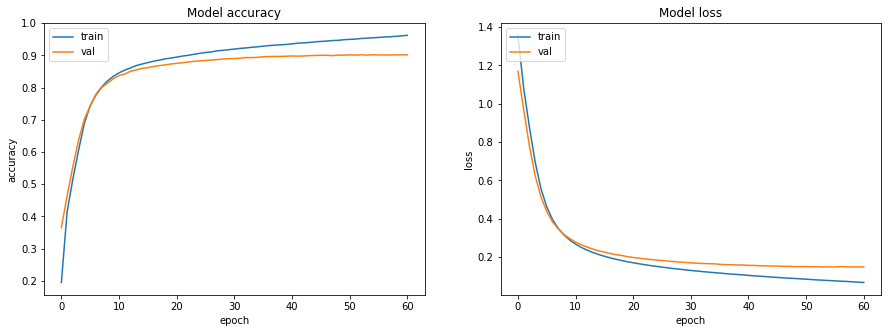

In [ ]:
def plot_accuracy_loss(history):

  plt.figure(figsize=(15, 5))

  ax = plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')

  ax = plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')

  plt.show()


plot_accuracy_loss(history_1)

Both the accuracy and the loss curves are smooth, with no strong signs of overfitting. Results seem to be quite good.

### Performances on the validation set

First, let's compute the predictions on the validation set. This is done to be able to evaluate the model according to the macro f1-score

In [ ]:
predictions_1 = LSTM_1Dense.predict(pad_sent_val)

41/41 [==============================] - 3s 9ms/step


The `categorical_2_tags` function allows to retrieve the lists of predicted tags from the categorical predictions of the network.

In [ ]:
def categorical_2_tags(categorical_predictions, unique_tags):

    """
    Retrieve predicted tags from `categorical_predictions`.
    """
    tags_sequences=[]
    for categorical_sequence in categorical_predictions:
        tags_sequence=[]
        for categorical in categorical_sequence:
            tags_sequence.append(unique_tags[np.argmax(categorical)])
        tags_sequences.append(tags_sequence)
    return tags_sequences


predictions_1 = categorical_2_tags(predictions_1, unique_tags)

The evaluation must be done without considering `_PAD_`, symbols and punctuation tags. Thus, they are filtered out and `labels_val` only contains tags to be considered during the f1-score computation on the validation set.

In [ ]:
# Extract tags which are not punctuation/symbols or padding

punctuation_symbols = ['#', '$', ',', '.', '``', "''", ':', '-RRB-', '-LRB-']

no_punct_pad_tags = list(unique_tags.copy())
for p in punctuation_symbols:
  no_punct_pad_tags.remove(p)

no_punct_pad_tags.remove("_PAD_")

# From previously extracted tags, select only those which appear in the validation set
labels_val = list(set(unique_tags_val).intersection(set(no_punct_pad_tags)))

print("The validation tags on which computing models metrics are:", labels_val)

The validation tags on which computing models metrics are: ['EX', 'PRP$', 'VBZ', 'NN', 'WP', 'IN', 'RBS', 'PRP', 'UH', 'TO', 'NNP', 'JJR', 'VBG', 'JJ', 'NNS', 'VBD', 'DT', 'WP$', 'VB', 'POS', 'VBP', 'LS', 'VBN', 'PDT', 'RBR', 'WRB', 'RP', 'MD', 'NNPS', 'WDT', 'FW', 'CD', 'CC', 'RB', 'JJS']


In [ ]:
# {model : scores}
scores_dict = dict()

# {model name : model}
models_dict = dict()

pad_tags_val_flat = list(itertools.chain(*pad_tags_val))
predictions_flat_1 = list(itertools.chain(*predictions_1))

report_1 = classification_report(pad_tags_val_flat, predictions_flat_1, labels = labels_val, zero_division = 0)
scores_dict['LSTM_1Dense'] = classification_report(pad_tags_val_flat, predictions_flat_1, labels = labels_val, output_dict = True, zero_division = 0)
models_dict['LSTM_1Dense'] = LSTM_1Dense

print(report_1)

              precision    recall  f1-score   support

          EX       0.88      0.62      0.72        34
        PRP$       0.99      0.95      0.97       256
         VBZ       0.95      0.92      0.94       695
          NN       0.90      0.90      0.90      4398
          WP       0.91      0.88      0.89        80
          IN       0.94      0.94      0.94      3177
         RBS       0.67      0.73      0.70        11
         PRP       0.83      0.86      0.85       570
          UH       0.00      0.00      0.00         2
          TO       1.00      0.99      0.99       746
         NNP       0.81      0.95      0.87      2642
         JJR       0.88      0.66      0.75       162
         VBG       0.80      0.72      0.76       462
          JJ       0.77      0.80      0.78      1858
         NNS       0.89      0.87      0.88      2060
         VBD       0.89      0.91      0.90       852
          DT       0.93      0.96      0.94      2651
         WP$       1.00    

The macro f1-score of the `LSMT_1Dense` model on the validation set is $0.74$

## 5.2 GRU

### Definition

The second model defined is composed by
* the **Input layer**, which takes as input sentences as a sequence of indexes
* an **Embedding layer**, initialized as for the baseline model
* a **GRU layer** of size $100$
* a **Time Distributed Dense layer** of size $46$
* an **Activation layer** with the softmax function

The setups for compiling the model and for the training process are the same as the baseline one.

In [ ]:
GRU_1Dense = Sequential()
GRU_1Dense.add(InputLayer(input_shape=(max_seq_length,)))
GRU_1Dense.add(Embedding(vocab_size, glove_size, weights = [embedding_matrix], input_length = (max_seq_length,glove_size), trainable = False, mask_zero = True))
GRU_1Dense.add(GRU(100, return_sequences=True))
GRU_1Dense.add(TimeDistributed(Dense(46)))
GRU_1Dense.add(Activation('softmax'))

GRU_1Dense.compile(loss='categorical_crossentropy',
               optimizer=Adam(0.001),
               metrics=['accuracy'])

GRU_1Dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 56, 100)           40374300  
                                                                 
 gru (GRU)                   (None, 56, 100)           60600     
                                                                 
 time_distributed_1 (TimeDis  (None, 56, 46)           4646      
 tributed)                                                       
                                                                 
 activation_1 (Activation)   (None, 56, 46)            0         
                                                                 
Total params: 40,439,546
Trainable params: 65,246
Non-trainable params: 40,374,300
_________________________________________________________________


### Training

In [ ]:
history_2 = GRU_1Dense.fit(pad_sent_train, one_hot_tag_train, batch_size=128, epochs=100, validation_data=(pad_sent_val, one_hot_tag_val), callbacks = [callback])

Epoch 1/100
16/16 [==============================] - 6s 154ms/step - loss: 1.4583 - accuracy: 0.1295 - val_loss: 1.2587 - val_accuracy: 0.1982
Epoch 2/100
16/16 [==============================] - 0s 27ms/step - loss: 1.1708 - accuracy: 0.3345 - val_loss: 1.0449 - val_accuracy: 0.4368
Epoch 3/100
16/16 [==============================] - 0s 24ms/step - loss: 0.9476 - accuracy: 0.5039 - val_loss: 0.8339 - val_accuracy: 0.5455
Epoch 4/100
16/16 [==============================] - 0s 25ms/step - loss: 0.7519 - accuracy: 0.5940 - val_loss: 0.6806 - val_accuracy: 0.6299
Epoch 5/100
16/16 [==============================] - 0s 25ms/step - loss: 0.6184 - accuracy: 0.6818 - val_loss: 0.5741 - val_accuracy: 0.6885
Epoch 6/100
16/16 [==============================] - 0s 27ms/step - loss: 0.5258 - accuracy: 0.7268 - val_loss: 0.4985 - val_accuracy: 0.7292
Epoch 7/100
16/16 [==============================] - 1s 46ms/step - loss: 0.4595 - accuracy: 0.7582 - val_loss: 0.4439 - val_accuracy: 0.7573
Epoch

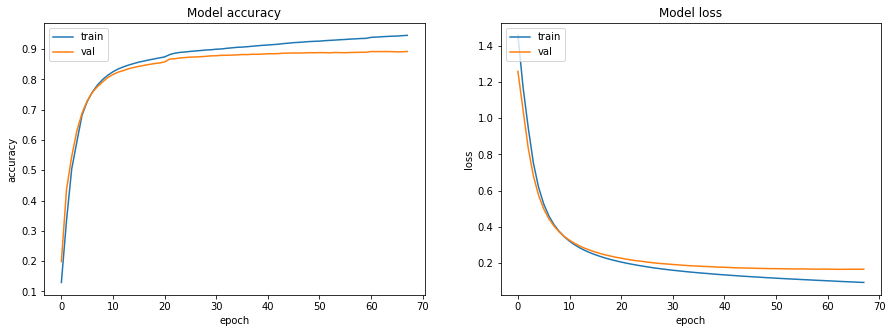

In [ ]:
plot_accuracy_loss(history_2)

Again, both the accuracy and the loss curves are smooth, with no strong signs of overfitting. Results seem to be slighlty worse than the baseline model, but still quite good.

### Performances on the validation set

Let's see how the `GRU_1Dense` model performs on the validation set according the macro f1-score.

In [ ]:
predictions_2 = GRU_1Dense.predict(pad_sent_val)

41/41 [==============================] - 2s 4ms/step


In [ ]:
predictions_2 = categorical_2_tags(predictions_2, unique_tags)

In [ ]:
predictions_flat_2 = list(itertools.chain(*predictions_2))

report_2 = classification_report(pad_tags_val_flat, predictions_flat_2, labels = labels_val, zero_division = 0)
scores_dict['GRU_1Dense'] = classification_report(pad_tags_val_flat, predictions_flat_2, labels = labels_val, output_dict = True, zero_division = 0)
models_dict['GRU_1Dense'] = GRU_1Dense

print(report_2)

              precision    recall  f1-score   support

          EX       0.91      0.62      0.74        34
        PRP$       0.98      0.95      0.96       256
         VBZ       0.96      0.91      0.93       695
          NN       0.91      0.88      0.90      4398
          WP       0.95      0.88      0.91        80
          IN       0.96      0.93      0.94      3177
         RBS       0.50      0.64      0.56        11
         PRP       0.01      0.77      0.02       570
          UH       0.00      0.00      0.00         2
          TO       1.00      0.99      0.99       746
         NNP       0.72      0.95      0.82      2642
         JJR       0.90      0.69      0.78       162
         VBG       0.78      0.78      0.78       462
          JJ       0.78      0.77      0.77      1858
         NNS       0.92      0.87      0.89      2060
         VBD       0.89      0.89      0.89       852
          DT       0.88      0.96      0.92      2651
         WP$       1.00    

Results are coherent with the validation accuracy values observed during training, as the macro f1-score reached by the `GRU_1Dense` model is $0.70$, so $0.04$ points lower with respect to the baseline one.

## 5.3 LSTM + 2 Dense layers

### Definition

The third model defined is composed by
* the **Input layer**, which takes as input sentences as a sequence of indexes
* an **Embedding layer**, initialized as for the baseline model
* a **Bidirectional LSTM layer** of size $100$
* a **Time Distributed Dense layer** of size $256$
* another **Time Distributed Dense layer** of size $46$
* an **Activation layer** with the softmax function

The setups for compiling the model and for the training process are again the same as the baseline one.

In [ ]:
LSTM_2Dense = Sequential()
LSTM_2Dense.add(InputLayer(input_shape=(max_seq_length,)))
LSTM_2Dense.add(Embedding(vocab_size, glove_size, weights = [embedding_matrix], input_length = (max_seq_length,glove_size), trainable = False, mask_zero = True))
LSTM_2Dense.add(Bidirectional(LSTM(100, return_sequences=True)))
LSTM_2Dense.add(TimeDistributed(Dense(256)))
LSTM_2Dense.add(TimeDistributed(Dense(46)))
LSTM_2Dense.add(Activation('softmax'))

LSTM_2Dense.compile(loss='categorical_crossentropy',
               optimizer=Adam(0.001),
               metrics=['accuracy'])

LSTM_2Dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 56, 100)           40374300  
                                                                 
 bidirectional_1 (Bidirectio  (None, 56, 200)          160800    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 56, 256)          51456     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 56, 46)           11822     
 tributed)                                                       
                                                                 
 activation_2 (Activation)   (None, 56, 46)            0         
                                                      

### Training

In [ ]:
history_3 = LSTM_2Dense.fit(pad_sent_train, one_hot_tag_train, batch_size=128, epochs=100, validation_data=(pad_sent_val, one_hot_tag_val), callbacks = [callback])

Epoch 1/100
16/16 [==============================] - 14s 294ms/step - loss: 1.3161 - accuracy: 0.2236 - val_loss: 1.0972 - val_accuracy: 0.3816
Epoch 2/100
16/16 [==============================] - 1s 50ms/step - loss: 0.9487 - accuracy: 0.4589 - val_loss: 0.7667 - val_accuracy: 0.5314
Epoch 3/100
16/16 [==============================] - 1s 43ms/step - loss: 0.6317 - accuracy: 0.6136 - val_loss: 0.5167 - val_accuracy: 0.6831
Epoch 4/100
16/16 [==============================] - 1s 44ms/step - loss: 0.4319 - accuracy: 0.7420 - val_loss: 0.3818 - val_accuracy: 0.7627
Epoch 5/100
16/16 [==============================] - 1s 43ms/step - loss: 0.3306 - accuracy: 0.7987 - val_loss: 0.3132 - val_accuracy: 0.8051
Epoch 6/100
16/16 [==============================] - 1s 41ms/step - loss: 0.2750 - accuracy: 0.8312 - val_loss: 0.2750 - val_accuracy: 0.8270
Epoch 7/100
16/16 [==============================] - 1s 70ms/step - loss: 0.2419 - accuracy: 0.8523 - val_loss: 0.2484 - val_accuracy: 0.8443
Epoc

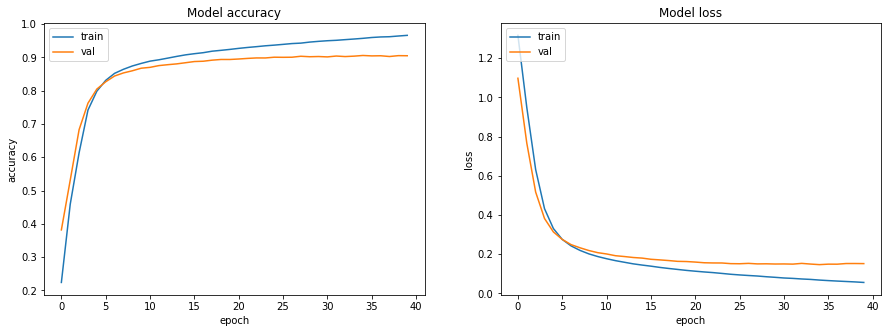

In [ ]:
plot_accuracy_loss(history_3)

Both the accuracy and the loss curves are again quite smooth, with no strong signs of overfitting. Results are still good, reached with fewer epochs than previous models.

### Performances on the validation set

Let's see how the `LSTM_2Dense` model performs on the validation set according the macro f1-score.

In [ ]:
predictions_3 = LSTM_2Dense.predict(pad_sent_val)

41/41 [==============================] - 3s 6ms/step


In [ ]:
predictions_3 = categorical_2_tags(predictions_3, unique_tags)

In [ ]:
predictions_flat_3 = list(itertools.chain(*predictions_3))

report_3 = classification_report(pad_tags_val_flat, predictions_flat_3, labels = labels_val, zero_division = 0)
scores_dict['LSTM_2Dense'] = classification_report(pad_tags_val_flat, predictions_flat_3, labels = labels_val, output_dict = True, zero_division = 0)
models_dict['LSTM_2Dense'] = LSTM_2Dense
print(report_3)

              precision    recall  f1-score   support

          EX       1.00      0.62      0.76        34
        PRP$       0.98      0.94      0.96       256
         VBZ       0.95      0.93      0.94       695
          NN       0.91      0.90      0.90      4398
          WP       0.93      0.85      0.89        80
          IN       0.94      0.94      0.94      3177
         RBS       0.50      0.55      0.52        11
         PRP       0.83      0.86      0.85       570
          UH       0.00      0.00      0.00         2
          TO       1.00      0.99      0.99       746
         NNP       0.06      0.94      0.11      2642
         JJR       0.85      0.69      0.76       162
         VBG       0.77      0.78      0.78       462
          JJ       0.80      0.82      0.81      1858
         NNS       0.89      0.89      0.89      2060
         VBD       0.90      0.90      0.90       852
          DT       0.95      0.97      0.96      2651
         WP$       1.00    

The macro f1-score reached by the `LSTM_2Dense` on the validation set is $0.72$, showing performances quality between the `LSTM_1Dense` and `GRU_1Dense` models.

## 5.4 Two LSTM + 1 Dense layer

### Definition

The fourth and last model defined is composed by
* the **Input layer**, which takes as input sentences as a sequence of indexes
* an **Embedding layer**, initialized as for the baseline model
* a **Bidirectional LSTM layer** of size $100$
* another **TBidirectional LSTM laye** of size $200$
* a **Time Distributed Dense layer** of size $46$
* an **Activation layer** with the softmax function

The setups for compiling the model and for the training process are again the same as the baseline one.

In [ ]:
LSTM2_1Dense = Sequential()
LSTM2_1Dense.add(InputLayer(input_shape=(max_seq_length,)))
LSTM2_1Dense.add(Embedding(vocab_size, glove_size, weights = [embedding_matrix], input_length = (max_seq_length,glove_size), trainable = False, mask_zero = True))
LSTM2_1Dense.add(Bidirectional(LSTM(100, return_sequences=True)))
LSTM2_1Dense.add(Bidirectional(LSTM(200, return_sequences=True)))
LSTM2_1Dense.add(TimeDistributed(Dense(46)))
LSTM2_1Dense.add(Activation('softmax'))

LSTM2_1Dense.compile(loss='categorical_crossentropy',
               optimizer=Adam(0.001),
               metrics=['accuracy'])

LSTM2_1Dense.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 56, 100)           40374300  
                                                                 
 bidirectional_2 (Bidirectio  (None, 56, 200)          160800    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 56, 400)          641600    
 nal)                                                            
                                                                 
 time_distributed_4 (TimeDis  (None, 56, 46)           18446     
 tributed)                                                       
                                                                 
 activation_3 (Activation)   (None, 56, 46)            0         
                                                      

### Training

In [ ]:
history_4 = LSTM2_1Dense.fit(pad_sent_train, one_hot_tag_train, batch_size=128, epochs=100, validation_data=(pad_sent_val, one_hot_tag_val), callbacks = [callback])

Epoch 1/100
16/16 [==============================] - 26s 444ms/step - loss: 1.3347 - accuracy: 0.1636 - val_loss: 1.1781 - val_accuracy: 0.2318
Epoch 2/100
16/16 [==============================] - 1s 61ms/step - loss: 1.1109 - accuracy: 0.2745 - val_loss: 1.0062 - val_accuracy: 0.3421
Epoch 3/100
16/16 [==============================] - 1s 59ms/step - loss: 0.8902 - accuracy: 0.4498 - val_loss: 0.7551 - val_accuracy: 0.5348
Epoch 4/100
16/16 [==============================] - 1s 92ms/step - loss: 0.6346 - accuracy: 0.6164 - val_loss: 0.5385 - val_accuracy: 0.6627
Epoch 5/100
16/16 [==============================] - 1s 81ms/step - loss: 0.4584 - accuracy: 0.7263 - val_loss: 0.4163 - val_accuracy: 0.7440
Epoch 6/100
16/16 [==============================] - 1s 53ms/step - loss: 0.3580 - accuracy: 0.7882 - val_loss: 0.3395 - val_accuracy: 0.7907
Epoch 7/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2959 - accuracy: 0.8232 - val_loss: 0.2929 - val_accuracy: 0.8195
Epoc

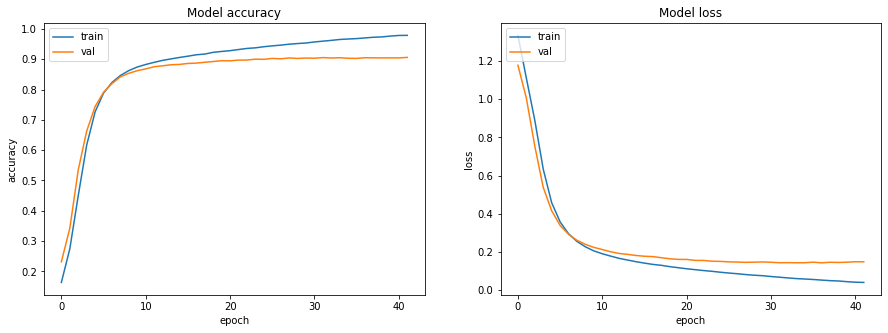

In [ ]:
plot_accuracy_loss(history_4)

Out of the four models, the results reached by the `LSTM2_1Dense` model on the training and validation set are the best, reached in just over $40$ epochs. Also, the smoothness of the loss and accuracy curves shows that no overfitting occured.

### Performances on the validation set

Let's see how the model performs on the validation set, according to the macro f1-score.

In [ ]:
predictions_4 = LSTM2_1Dense.predict(pad_sent_val)

41/41 [==============================] - 6s 12ms/step


In [ ]:
predictions_4 = categorical_2_tags(predictions_4, unique_tags)

In [ ]:
predictions_flat_4 = list(itertools.chain(*predictions_4))

report_4 = classification_report(pad_tags_val_flat, predictions_flat_4, labels = labels_val, zero_division = 0)
scores_dict['LSTM2_1Dense'] = classification_report(pad_tags_val_flat, predictions_flat_4, labels = labels_val, output_dict = True, zero_division = 0)
models_dict['LSTM2_1Dense'] = LSTM2_1Dense
print(report_4)

              precision    recall  f1-score   support

          EX       0.85      0.68      0.75        34
        PRP$       0.98      0.95      0.96       256
         VBZ       0.96      0.93      0.95       695
          NN       0.93      0.89      0.91      4398
          WP       0.89      0.84      0.86        80
          IN       0.94      0.94      0.94      3177
         RBS       0.67      0.91      0.77        11
         PRP       0.81      0.88      0.84       570
          UH       0.00      0.00      0.00         2
          TO       1.00      0.99      0.99       746
         NNP       0.85      0.92      0.88      2642
         JJR       0.88      0.67      0.76       162
         VBG       0.82      0.77      0.79       462
          JJ       0.76      0.82      0.79      1858
         NNS       0.90      0.88      0.89      2060
         VBD       0.92      0.90      0.91       852
          DT       0.94      0.96      0.95      2651
         WP$       1.00    

As expected, the `LSTM2_1Dense` model performs better than the others on the validation also according to the macro f1-score, which is $0.75$.

# 6. Two best models selection

To select the two best models out of the four according to their performances on the validation set, a summary of the previously computed macro f1-scores of the four models is presented.




In [ ]:
# Model's f1-score summary

f1_scores_macro_dict = {}
rows = [['Model','macro f1-score val'],['','']]

for model in models_dict.keys():
  f1_scores_macro_dict[model] = scores_dict[model]['macro avg']['f1-score']
  rows.append([model, scores_dict[model]['macro avg']['f1-score']])

lens = []
for col in zip(*rows):
    lens.append(max([len(str(v)) for v in col]))
format = "  ".join(["{:<" + str(l) + "}" for l in lens])

for row in rows:
    print(format.format(*row))

Model         macro f1-score val
                                
LSTM_1Dense   0.741311922056217 
GRU_1Dense    0.6986959921884467
LSTM_2Dense   0.7207642039636207
LSTM2_1Dense  0.7499660920109237


The numerical analysis shows that the best architectures are based on Bidirectional LSTM layers with only one Dense layer.

In [ ]:
sorted_f1_scores = sorted(f1_scores_macro_dict, key=f1_scores_macro_dict.get, reverse=True)

best_model_1 = sorted_f1_scores[0]
best_model_2 = sorted_f1_scores[1]

print('According to the macro f1-score on the validation set, the two best models are:', best_model_1, 'and', best_model_2)

According to the macro f1-score on the validation set, the two best models are: LSTM2_1Dense and LSTM_1Dense


# 7. Models evaluation

Once the two best models are selected, they are also evaluated on the test set.

First, let's remove punctuation and symbols from the test set tags.

In [ ]:
# From no_punct_pad_tags, select only those which appear in the test set

labels_test = list(set(unique_tags_test).intersection(set(no_punct_pad_tags)))

print("The test tags on which computing models metrics are:", labels_test)

The test tags on which computing models metrics are: ['EX', 'PRP$', 'VBZ', 'NN', 'WP', 'IN', 'RBS', 'PRP', 'TO', 'NNP', 'JJR', 'VBG', 'JJ', 'NNS', 'VBD', 'DT', 'WP$', 'VB', 'POS', 'VBP', 'PDT', 'VBN', 'RBR', 'WRB', 'RP', 'MD', 'NNPS', 'WDT', 'CD', 'CC', 'RB', 'JJS']


Let's see how the first best model performs on the test set.


In [ ]:
# Best_model_1 evaluation on the test set

pad_tags_test_flat = list(itertools.chain(*pad_tags_test))

predictions_test_1 = models_dict[best_model_1].predict(pad_sent_test)
predictions_test_1 = categorical_2_tags(predictions_test_1, unique_tags)

21/21 [==============================] - 0s 12ms/step


In [ ]:
predictions_flat_test_1 = list(itertools.chain(*predictions_test_1))

report_test_1 = classification_report(pad_tags_test_flat, predictions_flat_test_1, labels = labels_test, zero_division = 0)
scores_1 = classification_report(pad_tags_test_flat, predictions_flat_test_1, labels = labels_test, output_dict = True, zero_division = 0)

print(report_test_1)

              precision    recall  f1-score   support

          EX       0.83      1.00      0.91         5
        PRP$       1.00      0.95      0.97        98
         VBZ       0.95      0.96      0.95       274
          NN       0.93      0.88      0.90      2354
          WP       0.89      0.89      0.89        19
          IN       0.96      0.94      0.95      1613
         RBS       0.67      0.67      0.67         3
         PRP       0.81      0.90      0.86       187
          TO       1.00      1.00      1.00       377
         NNP       0.86      0.90      0.88      1469
         JJR       0.78      0.68      0.73        59
         VBG       0.86      0.79      0.83       216
          JJ       0.77      0.80      0.78       910
         NNS       0.86      0.90      0.88       934
         VBD       0.93      0.91      0.92       627
          DT       0.94      0.97      0.95      1316
         WP$       1.00      0.75      0.86         4
          VB       0.91    

The same procedure is also done for the second best model.

In [ ]:
# Best_model_2 evaluation on the test set

predictions_test_2 = models_dict[best_model_2].predict(pad_sent_test)
predictions_test_2 = categorical_2_tags(predictions_test_2, unique_tags)

21/21 [==============================] - 0s 6ms/step


In [ ]:
predictions_flat_test_2 = list(itertools.chain(*predictions_test_2))

report_test_2 = classification_report(pad_tags_test_flat, predictions_flat_test_2, labels = labels_test, zero_division = 0)
scores_2 = classification_report(pad_tags_test_flat, predictions_flat_test_2, labels = labels_test, output_dict = True, zero_division = 0)

print(report_test_2)

              precision    recall  f1-score   support

          EX       1.00      0.80      0.89         5
        PRP$       1.00      0.95      0.97        98
         VBZ       0.94      0.96      0.95       274
          NN       0.91      0.90      0.90      2354
          WP       1.00      0.95      0.97        19
          IN       0.95      0.94      0.94      1613
         RBS       1.00      0.67      0.80         3
         PRP       0.85      0.86      0.86       187
          TO       1.00      1.00      1.00       377
         NNP       0.82      0.94      0.88      1469
         JJR       0.89      0.68      0.77        59
         VBG       0.86      0.76      0.81       216
          JJ       0.77      0.77      0.77       910
         NNS       0.87      0.88      0.87       934
         VBD       0.90      0.93      0.92       627
          DT       0.94      0.96      0.95      1316
         WP$       1.00      0.75      0.86         4
          VB       0.94    

From the two classification reports it can be seen, for both models, a sharp increase in performances with respect to the results on the validation set. In particular, the macro f1-score reached by the `LMST_1Dense` and the `LMST2_1Dense` models are $0.81$ and $0.80$ respectively.

# 8. Test set results discussion & error analysis



In this section, obtained results are discussed and analyzed, with a particular focus on specific types of errors.

## 8.1 Comparison between validation and test sets results

First, let's print the macro f1-score of the two best models on both the validation and the test sets.

In [ ]:
# Comparison between the performances of the two models on the validation and the test set

print("The macro f1-score of", best_model_1, "on the test set is:", scores_1['macro avg']['f1-score'])
print("The macro f1-score of", best_model_1, "on the validation set is: ", scores_dict[best_model_1]['macro avg']['f1-score'])
print()
print("The macro f1-score of", best_model_2, "on the test set is:", scores_2['macro avg']['f1-score'])
print("The macro f1-score of", best_model_2, "on the validation set is:", scores_dict[best_model_2]['macro avg']['f1-score'])

The macro f1-score of LSTM2_1Dense on the test set is: 0.8000854010750703
The macro f1-score of LSTM2_1Dense on the validation set is:  0.7499660920109237

The macro f1-score of LSTM_1Dense on the test set is: 0.814444805441775
The macro f1-score of LSTM_1Dense on the validation set is: 0.741311922056217


It can be noticed that, according to the macro f1-score metric, `LSTM-1Dense` and `LSTM2-1Dense` perform similarly, both of them obtaining better results on the test set than on the validation set.

However, in order to understand the nature of this difference, a further analysis is required. In particular, let's analyse the per-class f1-scores on test and validation sets, for only tags present in both.

In [ ]:
# Comparison common labels model 1

tags = list(set(labels_val).intersection(set(labels_test)))
rows = [['Tag','f1-score val','f1-score test'],['','','']]

for tag in tags:
  rows.append([tag, round(scores_dict[best_model_1][tag]['f1-score'],4), round(scores_1[tag]['f1-score'],4)])

lens = []
for col in zip(*rows):
    lens.append(max([len(str(v)) for v in col]))
format = "  ".join(["{:<" + str(l) + "}" for l in lens])

print("-"*10, best_model_1, 'model','-'*10,'\n')

for row in rows:
    print(format.format(*row))

---------- LSTM2_1Dense model ---------- 

Tag   f1-score val  f1-score test
                                 
EX    0.7541        0.9091       
PRP$  0.9622        0.9738       
VBZ   0.9451        0.9529       
NN    0.9055        0.905        
WP    0.8645        0.8947       
IN    0.9393        0.9505       
RBS   0.7692        0.6667       
PRP   0.8446        0.8557       
TO    0.9939        1.0          
NNP   0.8823        0.8785       
JJR   0.7622        0.7273       
VBG   0.7902        0.8261       
JJ    0.7896        0.7838       
NNS   0.8918        0.8785       
VBD   0.9094        0.92         
DT    0.9495        0.9539       
WP$   1.0           0.8571       
VB    0.9046        0.9366       
POS   0.9905        0.9967       
VBP   0.8521        0.8803       
PDT   0.1333        0.0          
VBN   0.79          0.7922       
RBR   0.6316        0.3871       
WRB   0.717         0.6512       
RP    0.6087        0.6027       
MD    0.9882        0.985        
NNPS 

In [ ]:
# Comparison common labels model 2

tags = list(set(labels_val).intersection(set(labels_test)))
rows = [['Tag','f1-score val','f1-score test'],['','','']]

for tag in tags:
  rows.append([tag, round(scores_dict[best_model_2][tag]['f1-score'],4), round(scores_2[tag]['f1-score'],4)])

lens = []
for col in zip(*rows):
    lens.append(max([len(str(v)) for v in col]))
format = "  ".join(["{:<" + str(l) + "}" for l in lens])

print("-"*10, best_model_2, 'model','-'*10,'\n')

for row in rows:
    print(format.format(*row))

---------- LSTM_1Dense model ---------- 

Tag   f1-score val  f1-score test
                                 
EX    0.7241        0.8889       
PRP$  0.968         0.9738       
VBZ   0.9356        0.9495       
NN    0.8985        0.9022       
WP    0.8917        0.973        
IN    0.94          0.9448       
RBS   0.6957        0.8          
PRP   0.8456        0.8564       
TO    0.9933        1.0          
NNP   0.8703        0.8776       
JJR   0.7535        0.7692       
VBG   0.758         0.8088       
JJ    0.7841        0.7676       
NNS   0.881         0.8749       
VBD   0.8995        0.9178       
DT    0.9425        0.9526       
WP$   0.8571        0.8571       
VB    0.9003        0.9484       
POS   0.9868        1.0          
VBP   0.8523        0.874        
PDT   0.0           0.0          
VBN   0.7925        0.788        
RBR   0.6053        0.4828       
WRB   0.7963        0.75         
RP    0.5926        0.6437       
MD    0.9822        0.985        
NNPS  

It can be noticed that per-class f1-scores on validation and test sets are comparable for both models and the small existing differences do not justify the significant difference in performance.

Let's then analyse the per-class f1-scores for those tags present in the validation but not in the test set (and viceversa).

In [ ]:
# Val-Test tags

val_test_tags_diff = [tag for tag in labels_val if tag not in labels_test]
print("The tags appearing in the validation set but not in the test set are:", val_test_tags_diff)

The tags appearing in the validation set but not in the test set are: ['UH', 'LS', 'FW']


In [ ]:
# Test-Val tags

test_val_tags_diff = [tag for tag in labels_test if tag not in labels_val]
print("The tags appearing in the test set but not in the validation set are:", test_val_tags_diff)

The tags appearing in the test set but not in the validation set are: []


Since all tags in the test set also appear in the validation set, the analyses will excusively consider those only present in the validation set.

In [ ]:
# f1-score of tags appearing only in the validation set

for tag in val_test_tags_diff:
  print("The f1-score of", best_model_1, "on", tag, "is", scores_dict[best_model_1][tag]['f1-score'])

print()

for tag in val_test_tags_diff:
  print("The f1-score of", best_model_2 ,"on", tag, "is", scores_dict[best_model_2][tag]['f1-score'])

The f1-score of LSTM2_1Dense on UH is 0.0
The f1-score of LSTM2_1Dense on LS is 0.4
The f1-score of LSTM2_1Dense on FW is 0.0

The f1-score of LSTM_1Dense on UH is 0.0
The f1-score of LSTM_1Dense on LS is 0.4444444444444444
The f1-score of LSTM_1Dense on FW is 0.0


These results show that uncommon tags, i.e. those present in the validation set but not in the test set, are heavily misclassified by both models, negatively contributing to the macro f1-score on the validation set. This might be a reasonably explanation of why the performances of both models are such worse on the validation set than on the test one.

## 8.2 F1-score, precision and recall

In order to compare the two best models results, it is useful to plot the macro f1-score, precision and recall obtained on the test set.

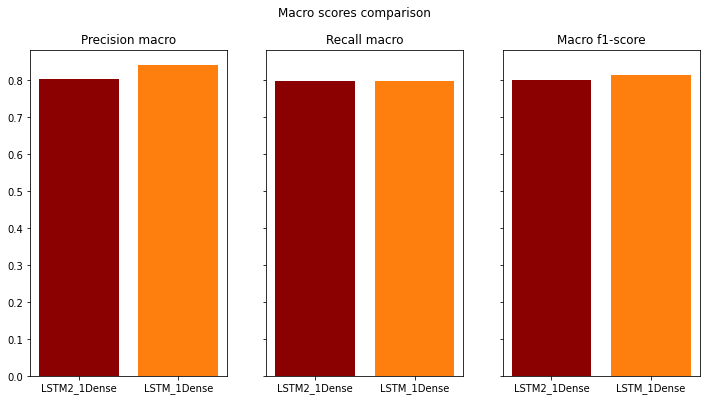

In [ ]:
# Macro comparison between the two models

prfs_2 = prfs(pad_tags_test_flat, predictions_flat_test_2, labels=labels_test, average="macro", zero_division=0)
prfs_1 = prfs(pad_tags_test_flat, predictions_flat_test_1, labels=labels_test, average="macro", zero_division=0)

fig, plots = plt.subplots(1,3, sharey=True, figsize=(12, 6))
fig.suptitle('Macro scores comparison')
plots[0].bar([best_model_1,best_model_2], [prfs_1[0], prfs_2[0]], color=["darkred", "tab:orange"])
plots[0].set_title("Precision macro")
plots[1].bar([best_model_1,best_model_2], [prfs_1[1], prfs_2[1]], color=["darkred", "tab:orange"])
plots[1].set_title("Recall macro")
plots[2].bar([best_model_1,best_model_2], [prfs_1[2], prfs_2[2]], color=["darkred", "tab:orange"])
plots[2].set_title("Macro f1-score")

plt.show()

Results of the two models are good and fully comparable, showing for each measure values $\geq 0.80$. Let's analyse these results in more details.

By visualizing the per-class measures, sorting tags for descending support, useful information about the distribution of precision, recall and f1-score can be extracted.

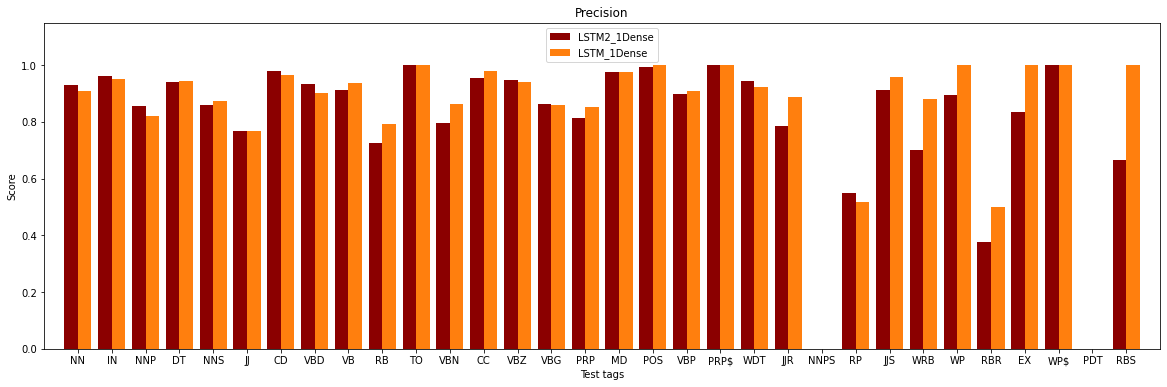

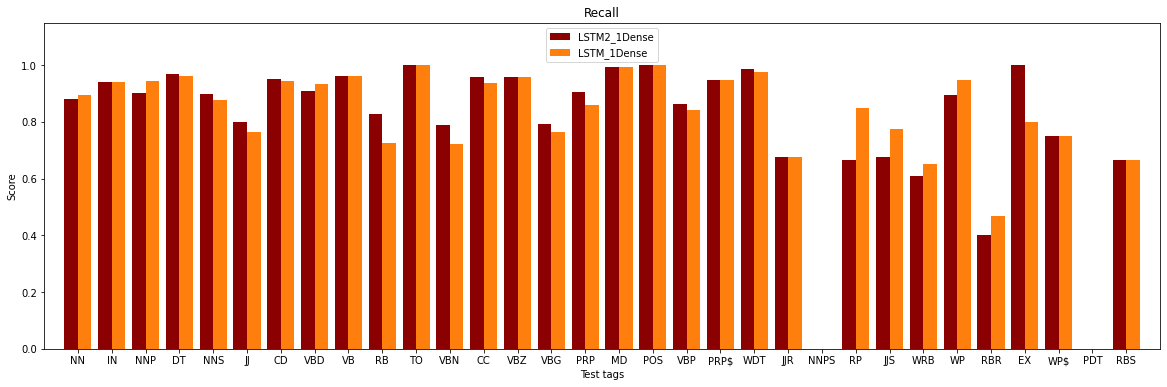

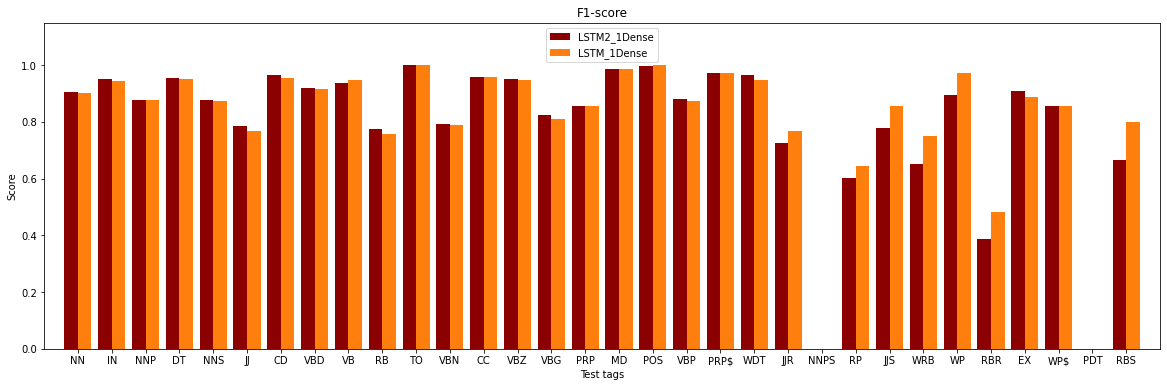

In [ ]:
# Extract all test tags sorted by descending support
sorted_keys = df_test[column].value_counts().keys()

# Keep only those on which compute metrics
sorted_test_tags = []
for k in sorted_keys:
  if k in labels_test:
    sorted_test_tags.append(k)

# Plots
prfs_2 = prfs(pad_tags_test_flat, predictions_flat_test_2, labels=sorted_test_tags, average=None, zero_division=0)
prfs_1 = prfs(pad_tags_test_flat, predictions_flat_test_1, labels=sorted_test_tags, average=None, zero_division=0)

width=0.2

ids = np.arange(0,len(sorted_test_tags))
x_labels = sorted_test_tags.copy()

fig, ax = plt.subplots(figsize=(20,6))
plt.bar(ids-width, prfs_1[0], width*2, label=best_model_1, color="darkred")
plt.bar(ids+width, prfs_2[0], width*2, label=best_model_2, color="tab:orange")

ax.set_ylim([0,1.15])
ax.set_xlim([-1,len(x_labels)])
ax.set_xticks(ids)
ax.set_xticklabels(x_labels)
plt.xlabel("Test tags")
plt.ylabel("Score")
plt.legend(loc='upper center')
plt.title('Precision')

plt.show()

print()

fig, ax = plt.subplots(figsize=(20,6))
plt.bar(ids-width, prfs_1[1], width*2, label=best_model_1, color="darkred")
plt.bar(ids+width, prfs_2[1], width*2, label=best_model_2, color="tab:orange")

ax.set_ylim([0,1.15])
ax.set_xlim([-1,len(x_labels)])
ax.set_xticks(ids)
ax.set_xticklabels(x_labels)
plt.xlabel("Test tags")
plt.ylabel("Score")
plt.legend(loc='upper center')
plt.title('Recall')

plt.show()

print()

fig, ax = plt.subplots(figsize=(20,6))
plt.bar(ids-width, prfs_1[2], width*2, label=best_model_1, color="darkred")
plt.bar(ids+width, prfs_2[2], width*2, label=best_model_2, color="tab:orange")

ax.set_ylim([0,1.15])
ax.set_xlim([-1,len(x_labels)])
ax.set_xticks(ids)
ax.set_xticklabels(x_labels)
plt.xlabel("Test tags")
plt.ylabel("Score")
plt.legend(loc='upper center')
plt.title('F1-score')

plt.show()

In particular, it can be seen that the tags with an higher support are mostly correctly classified (high precision), without making too much mistakes (high recall). Thus, on them both models achieve satisfactory f1-score values.

For what concerns lower support tags, results are different. On them, both models show lower precision and recall (and as a consequence a lower f1-score), struggling to classify them. For example, on NNPS and PDT tags they both obtain an f1-score equal to $0$.

So, the precision, recall and f1-score distributions among classes turned out to be unbalanced towards most frequent tags.

## 8.2 Most and less frequent tags analysis

Since they might reveal important information about models, let's better visualize the f1-scores on the 4 most and on the 4 less frequent tags in the test set by printing their exact values.

In [ ]:
# Print the 4 most frequent test tags
n = 4
most_freq_test_tags = df_test[column].value_counts()[:n].index.tolist()
most_freq_test_tags

['NN', 'IN', 'NNP', 'DT']

In [ ]:
# Print the 4 less frequent test tags
less_freq_test_tags = df_test[column].value_counts()[-n:].index.tolist()
less_freq_test_tags

['EX', 'WP$', 'PDT', 'RBS']

In [ ]:
# Most frequent tag analysis

print('The', n, 'most frequent tags in the test set are', list(most_freq_test_tags),'\n')

for tag in most_freq_test_tags:
  print('The f1-score of the first model on', tag, 'is', scores_1[tag]['f1-score'])
  print('The f1-score of the second model on', tag, 'is', scores_2[tag]['f1-score'])
  print('\n')

The 4 most frequent tags in the test set are ['NN', 'IN', 'NNP', 'DT'] 

The f1-score of the first model on NN is 0.904969485614647
The f1-score of the second model on NN is 0.9021622778848213


The f1-score of the first model on IN is 0.9505322479649343
The f1-score of the second model on IN is 0.9448082319925165


The f1-score of the first model on NNP is 0.8784860557768924
The f1-score of the second model on NNP is 0.8776478027189377


The f1-score of the first model on DT is 0.95391532409142
The f1-score of the second model on DT is 0.9526315789473685




Both models perform well on all 4 highest support tags.

In [ ]:
# Less frequent tag analysis

print('The', n, 'less frequent tags in the test set are', list(less_freq_test_tags),'\n')

for tag in less_freq_test_tags:
  print('The f1-score of the first model on', tag, 'is', scores_1[tag]['f1-score'])
  print('The f1-score of the second model on', tag, 'is', scores_2[tag]['f1-score'])
  print('\n')

The 4 less frequent tags in the test set are ['EX', 'WP$', 'PDT', 'RBS'] 

The f1-score of the first model on EX is 0.9090909090909091
The f1-score of the second model on EX is 0.888888888888889


The f1-score of the first model on WP$ is 0.8571428571428571
The f1-score of the second model on WP$ is 0.8571428571428571


The f1-score of the first model on PDT is 0.0
The f1-score of the second model on PDT is 0.0


The f1-score of the first model on RBS is 0.6666666666666666
The f1-score of the second model on RBS is 0.8




Performances are different for what concerns the 4 lowest support tags. In particular, PDT is completely misclassified by both networks.

As stated in the previous section, the unbalanced nature of the dataset affected the results, as the networks have been trained with fewer example of less frequent tags than most frequent ones, resulting in a poor classification of the formers.

## 8.3 Confusion matrix and specific errors analysis

As a further analysis, let's visualize confusion matrices for both models.

[Text(159.0, 0.5, 'True Labels'), Text(0.5, 159.0, 'Predicted Labels')]

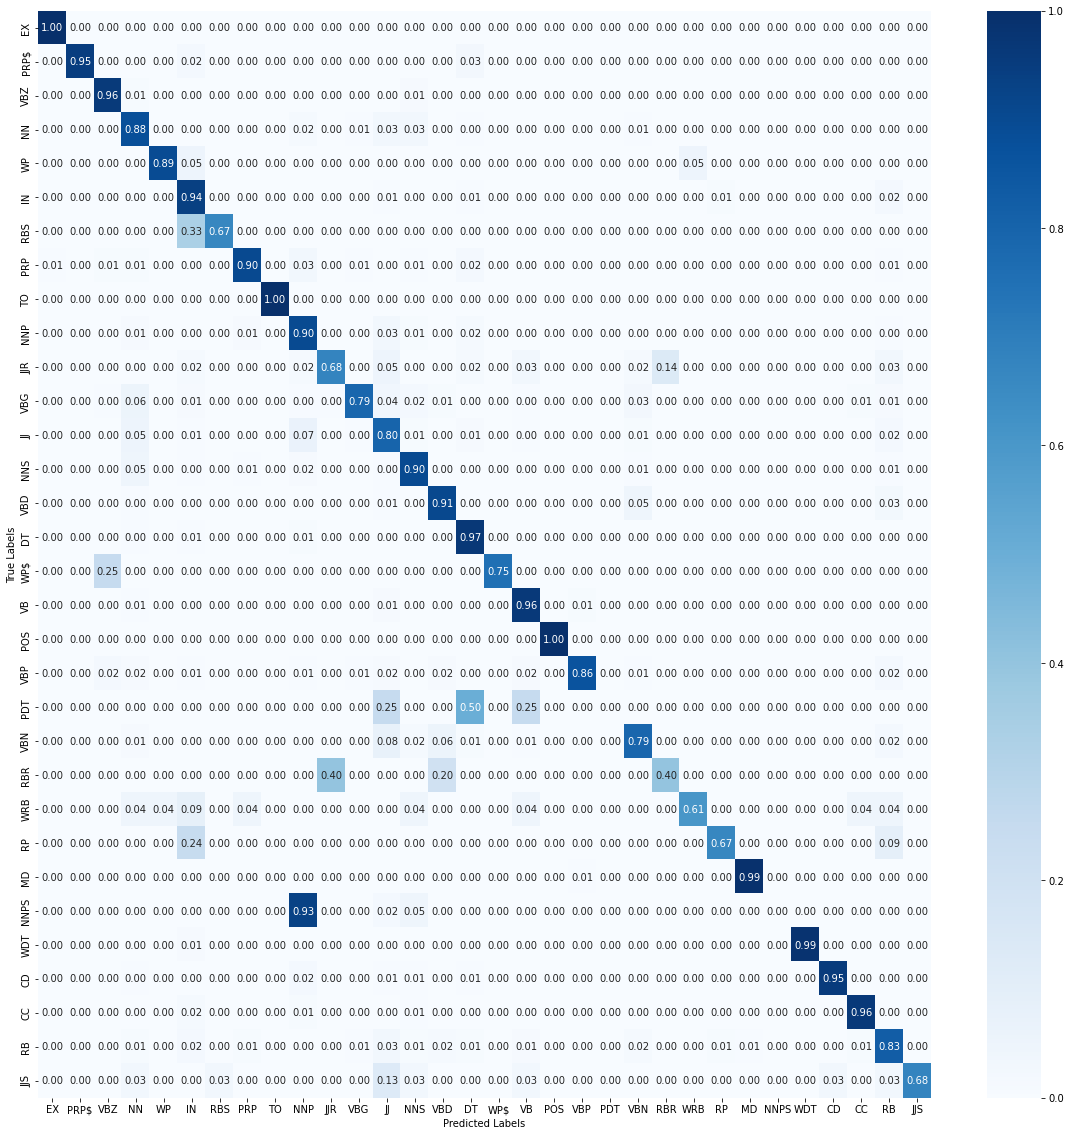

In [ ]:
# Confusion matrix best_model_1

fig, ax = plt.subplots(figsize=(20, 20))
confusion_matrix_1 = confusion_matrix(pad_tags_test_flat, predictions_flat_test_1, normalize='true', labels=labels_test)

heatmap_1 = sns.heatmap(confusion_matrix_1, annot = True, fmt = '.2f', ax = ax, cmap='Blues', xticklabels = labels_test, yticklabels = labels_test)
heatmap_1.set(xlabel='Predicted Labels', ylabel='True Labels')

[Text(159.0, 0.5, 'True Labels'), Text(0.5, 159.0, 'Predicted Labels')]

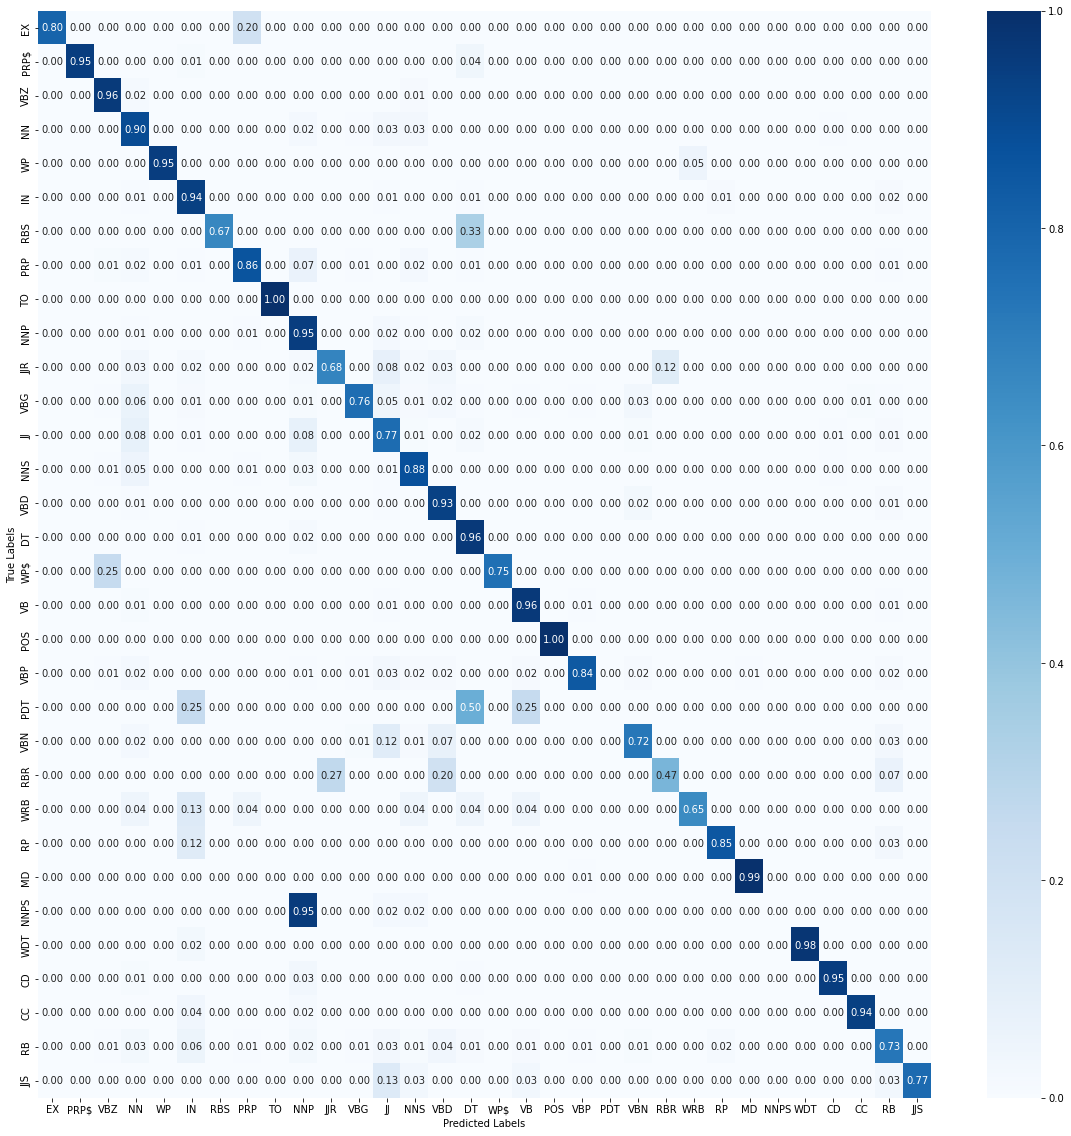

In [ ]:
# Confusion matrix best_model_2

fig, ax = plt.subplots(figsize=(20, 20))
confusion_matrix_2 = confusion_matrix(pad_tags_test_flat, predictions_flat_test_2, normalize='true', labels = labels_test)

heatmap_2 = sns.heatmap(confusion_matrix_2, annot = True, fmt = '.2f', ax = ax, cmap='Blues', xticklabels = labels_test, yticklabels = labels_test)
heatmap_2.set(xlabel='Predicted Labels', ylabel='True Labels')

As already underlined by looking at f1-score plots, there are several tags which are completely misclassified by the models. Let's have a deeper look at the more interesting ones.

### Misclassified sample - NNPS

Let's first have a look on how the two models classify the *plural proper noun* NNPS tag.
They both show on it an f1-score equal to 0, classifying it most of the time as a *singular proper noun* NNP tag.

In [ ]:
# Misclassified samples - NNPS

df_tag_NNPS = df_test[df_test["tag"] == "NNPS"].sort_values(by=['sentence_id'])
id_NNPS_sentences = df_tag_NNPS['sentence_id'].unique()
id_first_sentence = int(df_test.sort_index().iloc[:1]["sentence_id"])

In [ ]:
for id in id_NNPS_sentences:
  l = len(sentences_test[id-id_first_sentence])

  sentence = sentences_test[id-id_first_sentence]
  true_tags = pad_tags_test[id-id_first_sentence][0:l]
  pred_tags_1 = np.array(predictions_test_1[id-id_first_sentence][0:l]).astype('object')
  pred_tags_2 = np.array(predictions_test_2[id-id_first_sentence][0:l]).astype('object')

  first_row = np.insert(sentence, 0, 'Sentence:')
  second_row = np.insert(true_tags, 0, 'True labels:')
  third_row = np.insert(pred_tags_1, 0, best_model_1 + ' predictions:')
  fourth_row = np.insert(pred_tags_2, 0, best_model_2 + ' predictions:')

  rows = [first_row, second_row, third_row, fourth_row]
  widths = [max(map(len, col)) for col in zip(*rows)]

  for row in rows:
      print("  ".join((val.ljust(width) for val, width in zip(row, widths))))

  print("-"*300)

Sentence:                  One  analyst  ,  Arthur  Stevenson  ,  of  Prudential-Bache  Securities  ,  New  York  ,  estimated  that  65  %   or  more  of  Brazil  's   newly  made  automobiles  run  on  alcohol  and  ca   n't  use  gasoline  .
True labels:               CD   NN       ,  NNP     NNP        ,  IN  NNP               NNPS        ,  NNP  NNP   ,  VBD        IN    CD  NN  CC  JJR   IN  NNP     POS  RB     VBN   NNS          VBP  IN  NN       CC   MD   RB   VB   NN        .
LSTM2_1Dense predictions:  RB   NN       ,  NNP     NNP        ,  IN  NNP               NNP         ,  NNP  NNP   ,  VBD        DT    CD  NN  CC  JJR   IN  NNP     POS  VBN    RB    NNS          RB   IN  NN       CC   MD   RB   VB   NNS       .
LSTM_1Dense predictions:   NNP  NN       ,  NNP     NNP        ,  IN  NNP               NNP         ,  NNP  NNP   ,  VBD        IN    CD  NN  CC  JJR   IN  NNP     POS  VBN    JJ    NNS          RB   IN  NN       CC   VBP  RB   VB   NNS       .
--------------------


The reason behind this kind of error could be that NNP and NNPS both refer to proper nouns and often occur one after the other, showing a close correlation. However, the NNP shows a test set support of $1471$, while NNPS only of $44$. Hence, the networks tend to confuse the two tags, probably because they have been trained with many more examples of NNP than NNPS, thus not being able to effectively encode and learn the difference between the two.

This is a clear consequence of the unbalanced nature of the dataset, as stated previously.

### Misclassified sample - PDT

Another example of this kind of behavior can be found in how the two models perform on the *predeterminer* PDT tag, half of the time classified as a *determiner* DT tag by both models.

In [ ]:
# Misclassified samples - PDT

df_tag_PDT = df_test[df_test["tag"] == "PDT"].sort_values(by=['sentence_id'])
id_PDT_sentences = df_tag_PDT['sentence_id'].unique()
id_first_sentence = int(df_test.sort_index().iloc[:1]["sentence_id"])

In [ ]:
for id in id_PDT_sentences:
  l = len(sentences_test[id-id_first_sentence])

  sentence = np.array(sentences_test[id-id_first_sentence]).astype('object')
  true_tags = pad_tags_test[id-id_first_sentence][0:l]
  pred_tags_1 = np.array(predictions_test_1[id-id_first_sentence][0:l]).astype('object')
  pred_tags_2 = np.array(predictions_test_2[id-id_first_sentence][0:l]).astype('object')

  first_row = np.insert(sentence, 0, 'Sentence:')
  second_row = np.insert(true_tags, 0, 'True labels:')
  third_row = np.insert(pred_tags_1, 0, best_model_1 + ' predictions:')
  fourth_row = np.insert(pred_tags_2, 0, best_model_2 + ' predictions:')

  rows = [first_row, second_row, third_row, fourth_row]
  widths = [max(map(len, col)) for col in zip(*rows)]

  for row in rows:
      print("  ".join((val.ljust(width) for val, width in zip(row, widths))))

  print("-"*300)

Sentence:                  But  it   is   n't  clear  yet  whether  the  central  bank  will  make  such  a   move  .
True labels:               CC   PRP  VBZ  RB   JJ     RB   IN       DT   JJ       NN    MD    VB    PDT   DT  NN    .
LSTM2_1Dense predictions:  CC   PRP  VBZ  RB   JJ     RB   IN       DT   JJ       NN    MD    VB    VB    DT  NN    .
LSTM_1Dense predictions:   IN   PRP  VBZ  RB   JJ     RB   IN       DT   JJ       NN    MD    VB    VB    DT  NN    .
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence:                  All  this  has  cast  a   pall  over  Columbia  Savings  &   Loan  Association  and  its   high-rolling  43-year-old  chairman  ,  Thomas  Spiegel  ,  who  built  the  $  12.7  billion  Beverly  Hills

Again, the two tags show a close correlation, as PDT words always occur before a DT word. However, DT is among the 4 most frequent tags, while PDT is among the 4 less frequent ones, with a support of $1317$ and $4$ respectively. Thus, models were trained on many more examples of DT than PDT, being not able to gain enough knowledge to distinguish the latter from the former.

This is another clear example of error caused by the unbalanced nature of the dataset.

### Misclassified sample - RBR

Another interesting misclassified sample is *comparative adverb* RBR tag, half the time predicted as *comparative adjective* JJR tag by at least one of the models. Let's see some sentences on which the tag has been misclassified.

In [ ]:
# Misclassified samples - RBR

df_tag_RBR = df_test[df_test["tag"] == "RBR"].sort_values(by=['sentence_id'])
id_RBR_sentences = df_tag_RBR['sentence_id'].unique()
id_first_sentence = int(df_test.sort_index().iloc[:1]["sentence_id"])

In [ ]:
for id in id_RBR_sentences:
  l = len(sentences_test[id-id_first_sentence])

  sentence = np.array(sentences_test[id-id_first_sentence]).astype('object')
  true_tags = pad_tags_test[id-id_first_sentence][0:l]
  pred_tags_1 = np.array(predictions_test_1[id-id_first_sentence][0:l]).astype('object')
  pred_tags_2 = np.array(predictions_test_2[id-id_first_sentence][0:l]).astype('object')

  first_row = np.insert(sentence, 0, 'Sentence:')
  second_row = np.insert(true_tags, 0, 'True labels:')
  third_row = np.insert(pred_tags_1, 0, best_model_1 + ' predictions:')
  fourth_row = np.insert(pred_tags_2, 0, best_model_2 + ' predictions:')

  rows = [first_row, second_row, third_row, fourth_row]
  widths = [max(map(len, col)) for col in zip(*rows)]

  for row in rows:
      print("  ".join((val.ljust(width) for val, width in zip(row, widths))))

  print("-"*300)

Sentence:                  A   shift  to  producing  more  alcohol  and  less  sugar  had  been  expected  ,  but  the  latest  news  ,  if  true  ,  indicates  a   more  drastic  shift  than  had  been  anticipated  .
True labels:               DT  NN     TO  VBG        JJR   NN       CC   JJR   NN     VBD  VBN   VBN       ,  CC   DT   JJS     NN    ,  IN  JJ    ,  VBZ        DT  RBR   JJ       NN     IN    VBD  VBN   VBN          .
LSTM2_1Dense predictions:  DT  NN     TO  VBG        RBR   NN       CC   JJR   NN     VBD  VBN   VBN       ,  CC   DT   JJS     NN    ,  IN  JJ    ,  VBZ        DT  RBR   JJ       NN     IN    VBD  VBN   VBN          .
LSTM_1Dense predictions:   DT  NN     TO  VBG        JJR   NN       CC   JJR   NN     VBD  VBN   VBN       ,  CC   DT   JJS     NN    ,  IN  NN    ,  VBZ        DT  JJR   JJ       NN     IN    VBD  VBN   VBN          .
----------------------------------------------------------------------------------------------------------------------------

In this case, there is no significative difference between the supports size of the two tags, but they both refer to comparative words. In particular, the word *more* can be used as a RBR as well as a JJR, depending on its function in the sentence. Hence, when trying to classify *more* the networks tend to confuse the two tags.

### Limitations and improvements

A possible effective solution to both these sources of error could be the deployment of data augmentation techniques, in order to approach the unbalanced classes problem.

Also, a possible limitation might be the use of a non-contextual word embedding as GloVe. The employment of a contextual word embedding, which assigns to each word a representation based on its context, better encoding its sense, might lead to improvement in performances, maybe mitigating the misclassification of words which acquire a different meaning depending on their function in the sentence.